# Opera ground-based radar

OPERA is the Radar Programme of EUMETNET and provides ground-based precipitation radar data over Europa at a temporal resolution of 15 minutes.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from datetime import datetime, timedelta
from pansat.products.ground_based.opera import (rainfall_rate,
                                                maximum_reflectivity)
from pansat.download.providers.meteo_france import GeoservicesProvider

t0 = datetime(2020, 10, 1, 10, 15)
t1 = t0 + timedelta(minutes=15)

In [2]:
files_rr = rainfall_rate.download(t0, t1)
files_mr = maximum_reflectivity.download(t0, t1)

In [3]:
dataset_rr = rainfall_rate.open(files_rr[0])
dataset_mr = maximum_reflectivity.open(files_mr[0])
lats = dataset_rr["latitude"]
lons = dataset_mr["longitude"]
qi = dataset_rr["quality_indicator"].data
pr = dataset_rr["precipitation_rate"].data
mr = dataset_mr["maximum_reflectivity"].data
mask = mr == mr.min()
pr = np.maximum(1e-4, pr)
pr[mask] = np.nan

/home/simon/build/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


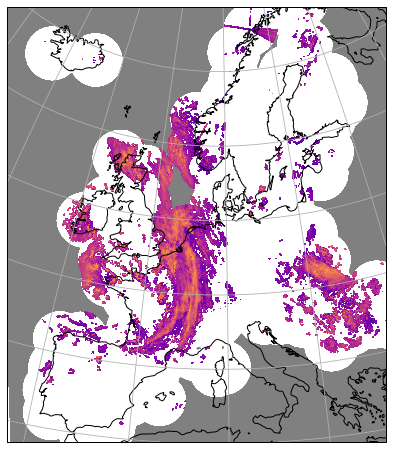

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
from matplotlib.cm import get_cmap

plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.EuroPP())
ax.coastlines(resolution='50m')

norm = LogNorm(1e-3, 1e2)
cmap = get_cmap("plasma")
cmap.set_bad((0.5, 0.5, 0.5, 0.5))
cmap.set_under((0, 0, 0, 0))
ax.pcolormesh(lons, lats, pr, norm=norm, cmap=cmap, transform=ccrs.PlateCarree())
ax.gridlines()